<a href="https://colab.research.google.com/github/AngeloUanini/Restaurant-review/blob/main/TP-Final-Restaurant-Review-Uanini.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabajo Final
Data Science III

**MetaData**


---

Esta base de datos contiene la informacion de las reseñas de varios restaurantes y las reseñas correspondientes dependiendo del periodo en que se encuentran, teniendo en cuanta si son restaurantes nuevos o antiguos y asi saber como progresan en el tiempo teniendo en cuenta como son administrados, si se mantienen en el tiempo con buen puntaje o se deterioran. Todo esto se vera influido en las reseñas de los mismos.

# Diccionario de Datos


---



restaurant_id: ID del restaurante

review_period: Número de periodo

review_period_description: Descripción del periodo (se refiere a que tan antiguo es)

reviewer_type: Tipo de reseñador (quien escribio la reseña)

review_text: La reseña del restaurante

rating: Puntuación dada (Esta varia del 1 al 5)

# Hipotesis


---



Lo esperable es que la mayoria de las reseñas sean positivas, esto teniendo en cuenta el comportamiento de la gente frente a una mala comida, mal estado del restaurante o un mal trato, estos factores suelen provocar que las personas quieran dejar una reseña por rencor a lo anteriormente mencionado, un restaurante no podria vender si tiene problemas que se puedan ver reflejados en la calificacion.

# Importaciones


---
Importamos la base de datos + el panda para que pueda leerla


In [45]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/AngeloUanini/Restaurant-review/refs/heads/main/restaurants_reviews.csv')

**Luego importamos las librerias para poder crear las visualizaciones sobre la base de datos y las funciones que vayamos a usar**


---



In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from wordcloud import WordCloud
from nltk.util import ngrams
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Pre Visualizacion Dataset


---



**Utilizamos el metodo head para ver las primeras filas del dataset**


---



In [47]:
df.head()

,restaurant_id,review_period,review_period_description,reviewer_type,review_text,rating
0,54522ff7-fcb1-431b-9584-f81f02ea10fd,1,Opening Hype (Year 1),Local Food Blogger with a Focus on Innovative ...,As a food blogger always on the lookout for ex...,5
1,54522ff7-fcb1-431b-9584-f81f02ea10fd,1,Opening Hype (Year 1),Local Food Blogger Trying the New Hotspot for ...,As a food blogger always seeking the newest cu...,5
2,54522ff7-fcb1-431b-9584-f81f02ea10fd,1,Opening Hype (Year 1),Food Blogger on a Budget Tour,As a foodie always hunting for new culinary ge...,5
3,54522ff7-fcb1-431b-9584-f81f02ea10fd,1,Opening Hype (Year 1),Local Food Blogger Covering New Restaurant Launch,As a food blogger constantly scouting new spot...,5
4,54522ff7-fcb1-431b-9584-f81f02ea10fd,1,Opening Hype (Year 1),Local Food Blogger Exploring New Hotspot,As a local food blogger always seeking fresh c...,5


**Utilizamos el metodo shape para ver el tamaño del dataset (cuantas filas y cuantas columnas)**


---



In [48]:
df.shape

(3594, 6)

**Utilizamos el metodo tail para ver las ultimas filas del dataset**


---



In [49]:
df.tail()

,restaurant_id,review_period,review_period_description,reviewer_type,review_text,rating
3589,374e19bb-9214-49a4-8536-a23563640cc3,4,Needs Overhaul (Year 4),Local Food Blogger on a Budget Trying to Stay ...,I visited this restaurant hoping for a decent ...,1
3590,374e19bb-9214-49a4-8536-a23563640cc3,4,Needs Overhaul (Year 4),Local Food Blogger on a Budget Trying to Find ...,"I came here hoping for a decent meal, but it w...",2
3591,374e19bb-9214-49a4-8536-a23563640cc3,4,Needs Overhaul (Year 4),Local Food Blogger for Budget-Friendly Dining,"Visited this place hoping for a decent meal, b...",2
3592,374e19bb-9214-49a4-8536-a23563640cc3,4,Needs Overhaul (Year 4),Local Food Blogger Visiting for Restaurant Rev...,I was excited to revisit this place after hear...,1
3593,374e19bb-9214-49a4-8536-a23563640cc3,4,Needs Overhaul (Year 4),Local Food Critic Reviewing Under Renovation C...,As a local critic during the restaurant's four...,1


**Utilizamos el metodo columns para ver que columnas contiene el dataset**


---



In [50]:
df.columns

Index(['restaurant_id', 'review_period', 'review_period_description',
       'reviewer_type', 'review_text', 'rating'],
      dtype='object')

**Utilizamos el metodo info para ver los datos no nulos para luego verificarlos**


---



In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3594 entries, 0 to 3593
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   restaurant_id              3594 non-null   object
 1   review_period              3594 non-null   int64 
 2   review_period_description  3594 non-null   object
 3   reviewer_type              3594 non-null   object
 4   review_text                3594 non-null   object
 5   rating                     3594 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 168.6+ KB


No se presentan datos nulos

**Utilizamos el metodo describe para ver el analisis estadistico de la base de datos**


---



In [52]:
df.describe()

,review_period,rating
count,3594.000000,3594.000000
mean,2.319978,3.212020
std,1.047445,1.284306
min,1.000000,1.000000
25%,1.000000,2.000000
50%,2.000000,3.000000
75%,3.000000,4.000000
max,4.000000,5.000000


# Verificacion de Datos Nulos


---



In [53]:
datos_nulos = df.isnull().sum()
datos_nulos

,0
restaurant_id,0
review_period,0
review_period_description,0
reviewer_type,0
review_text,0
rating,0


No se observan datos Nulos

**Veamos como esta distribuido el rating y los numeros dependiendo de la cantidad de reseñas**

<ipython-input-54-ad4a12b2feb7>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='rating', palette='Set2')


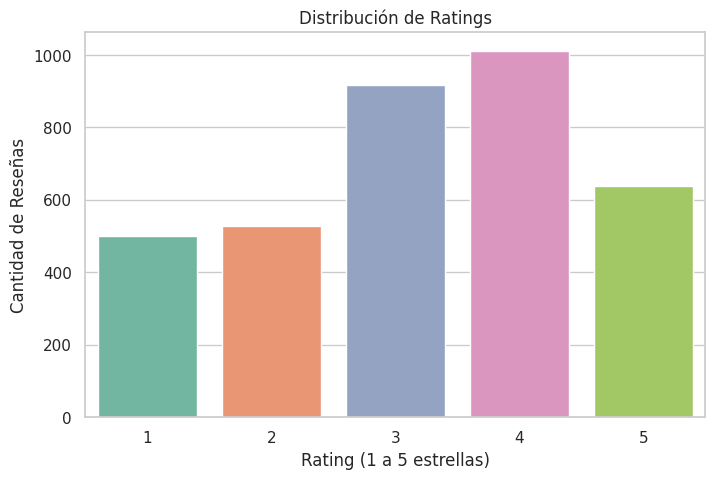

In [54]:
sns.set(style="whitegrid")

plt.figure(figsize=(8,5))
sns.countplot(data=df, x='rating', palette='Set2')
plt.title('Distribución de Ratings')
plt.xlabel('Rating (1 a 5 estrellas)')
plt.ylabel('Cantidad de Reseñas')
plt.show()


**A recomendacion del profesor vamos a convertir el puntaje de la columna puntaje a una variable binominal, manteniendo los valores 4 y 5 como buenos (1) y los valores 1 y 2 como malos (0) y procederemos a eliminar las filas de valor 3 para no tener los comentarios neutros**


---



In [55]:
# Crear una nueva columna con el sentimiento binario
df['sentiment_bin'] = df['rating'].apply(lambda x: 1 if x >= 4 else (0 if x <= 2 else None))

# Eliminar las filas con valor neutral (rating == 3)
df = df[df['sentiment_bin'].notnull()].copy()

luego de esto podemos ver cuantas positivas y negativas nos quedaron

<ipython-input-56-897f78b18326>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment_bin', palette='pastel')


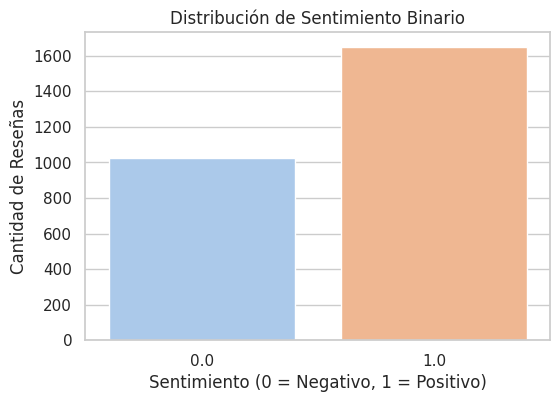

In [56]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='sentiment_bin', palette='pastel')
plt.title('Distribución de Sentimiento Binario')
plt.xlabel('Sentimiento (0 = Negativo, 1 = Positivo)')
plt.ylabel('Cantidad de Reseñas')
plt.show()

# Quitar simbolos, convertir a minusculas y signos de puntuacion


---



In [58]:
def quitar_simbolos(texto):
    # Convertir a minúsculas
    texto = texto.lower()

    # Reemplazar todo lo que no sea letra (A-Z o a-z) con un espacio
    texto = re.sub(r'[^a-zA-Z]', ' ', texto)

    return texto

# Crear una nueva columna con el texto limpio
df['texto_limpio'] = df['review_text'].apply(quitar_simbolos)

In [59]:
print(df[['review_text', 'texto_limpio']].head())

                                         review_text  \
0  As a food blogger always on the lookout for ex...   
1  As a food blogger always seeking the newest cu...   
2  As a foodie always hunting for new culinary ge...   
3  As a food blogger constantly scouting new spot...   
4  As a local food blogger always seeking fresh c...   

                                        texto_limpio  
0  as a food blogger always on the lookout for ex...  
1  as a food blogger always seeking the newest cu...  
2  as a foodie always hunting for new culinary ge...  
3  as a food blogger constantly scouting new spot...  
4  as a local food blogger always seeking fresh c...  


# Tokenizacion


---



In [60]:
def tokenizar(texto):
    texto = texto.lower()
    tokens = re.findall(r'\b[a-z]{2,}\b', texto)  # Solo palabras con letras, mín 2 letras
    return tokens

df['tokens'] = df['review_text'].apply(tokenizar)

print(df[['review_text', 'tokens']].head())


                                         review_text  \
0  As a food blogger always on the lookout for ex...   
1  As a food blogger always seeking the newest cu...   
2  As a foodie always hunting for new culinary ge...   
3  As a food blogger constantly scouting new spot...   
4  As a local food blogger always seeking fresh c...   

                                              tokens  
0  [as, food, blogger, always, on, the, lookout, ...  
1  [as, food, blogger, always, seeking, the, newe...  
2  [as, foodie, always, hunting, for, new, culina...  
3  [as, food, blogger, constantly, scouting, new,...  
4  [as, local, food, blogger, always, seeking, fr...  


**Es importante realizar este proceso de limpieza y tokenizar las palabras para luego poder entrenar el modelo, eliminando signos y mayusculas**

**Ahora vamos a remover las stopwords ya que estas palabras simples no aportan mucho al analisis de sentimiento**


---



In [61]:
nltk.download('stopwords')

# Lista de palabras vacías en inglés
stop_words = set(stopwords.words('english'))

# Función para eliminar stopwords
def eliminar_stopwords(tokens):
    return [word for word in tokens if word not in stop_words]

# Aplicar la función a la columna de tokens
df['tokens_filtrados'] = df['tokens'].apply(eliminar_stopwords)

print(df[['tokens', 'tokens_filtrados']].head())


                                              tokens  \
0  [as, food, blogger, always, on, the, lookout, ...   
1  [as, food, blogger, always, seeking, the, newe...   
2  [as, foodie, always, hunting, for, new, culina...   
3  [as, food, blogger, constantly, scouting, new,...   
4  [as, local, food, blogger, always, seeking, fr...   

                                    tokens_filtrados  
0  [food, blogger, always, lookout, exciting, new...  
1  [food, blogger, always, seeking, newest, culin...  
2  [foodie, always, hunting, new, culinary, gems,...  
3  [food, blogger, constantly, scouting, new, spo...  
4  [local, food, blogger, always, seeking, fresh,...  


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**Ahora vamos a realizar la lematizacion para trasformar las palabras a su forma base real**


---



In [62]:
nltk.download('wordnet')
nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer()

# Función para lematizar cada token
def lematizar_tokens(tokens):
    return [lemmatizer.lemmatize(token) for token in tokens]

# Aplicar al DataFrame
df['tokens_lematizados'] = df['tokens_filtrados'].apply(lematizar_tokens)

print(df[['tokens_filtrados', 'tokens_lematizados']].head())


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


                                    tokens_filtrados  \
0  [food, blogger, always, lookout, exciting, new...   
1  [food, blogger, always, seeking, newest, culin...   
2  [foodie, always, hunting, new, culinary, gems,...   
3  [food, blogger, constantly, scouting, new, spo...   
4  [local, food, blogger, always, seeking, fresh,...   

                                  tokens_lematizados  
0  [food, blogger, always, lookout, exciting, new...  
1  [food, blogger, always, seeking, newest, culin...  
2  [foodie, always, hunting, new, culinary, gem, ...  
3  [food, blogger, constantly, scouting, new, spo...  
4  [local, food, blogger, always, seeking, fresh,...  


**Ahora vamos a hacer las nubes de palabras para ver en grande las palabras que mas veces se repiten y poder ver mas claro que palabras suele usar la gente en sus reseñas**


---



para esto debemos convertir la lista de palabras de token lematizados en 1 solo texto largo (string), como listas wordcloud no puede leerlos.

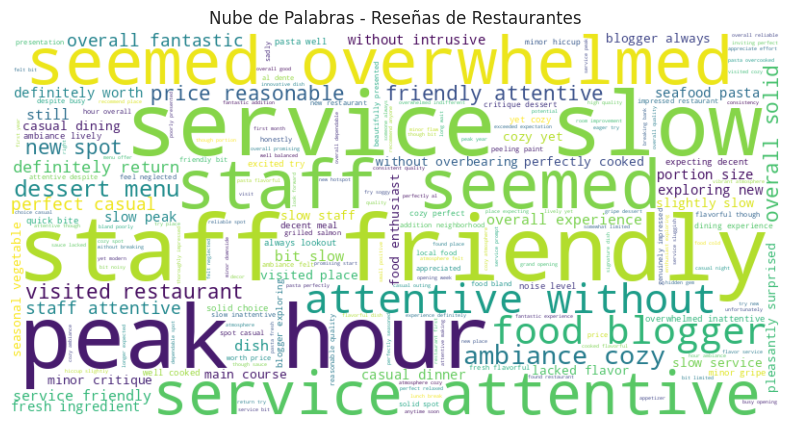

In [63]:
# Unir todos los tokens lematizados en un solo string
texto = " ".join([" ".join(tokens) for tokens in df['tokens_lematizados']])

# Crear la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Nube de Palabras - Reseñas de Restaurantes")
plt.show()


**Ahora veamos separando entre los positivos y negativos**


---



**Positivas**


---



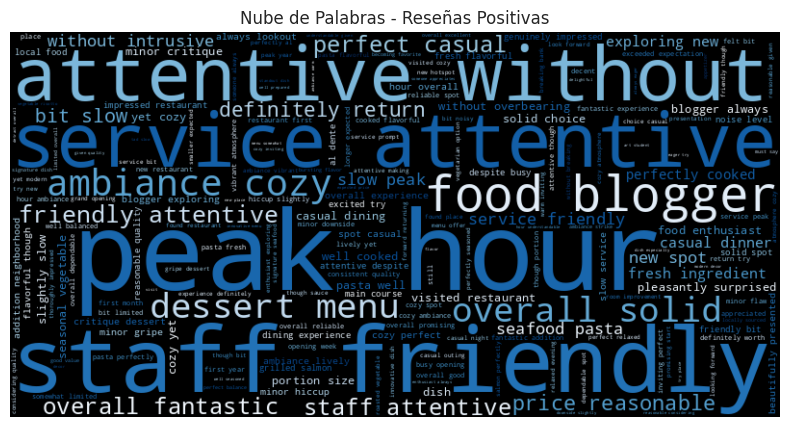

In [64]:
positivo = df[df['sentiment_bin'] == 1]
texto_pos = " ".join([" ".join(tokens) for tokens in positivo['tokens_lematizados']])

wordcloud_pos = WordCloud(width=800, height=400, background_color='black', colormap ='Blues').generate(texto_pos)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title("Nube de Palabras - Reseñas Positivas")
plt.show()

**Negativas**


---



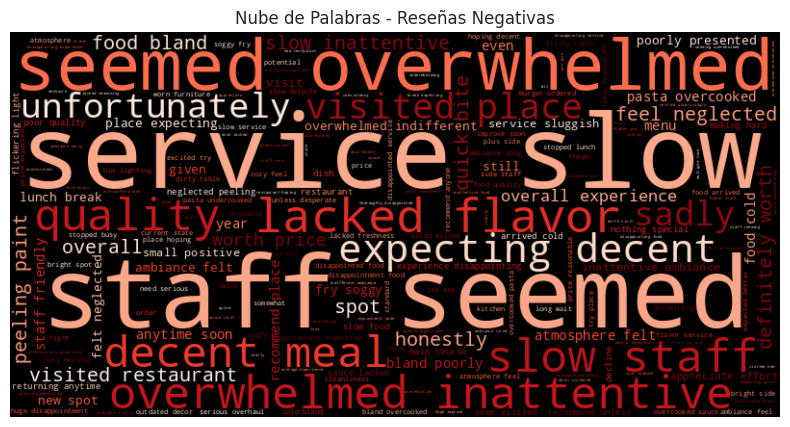

In [65]:
negativo = df[df['sentiment_bin'] == 0]
texto_neg = " ".join([" ".join(tokens) for tokens in negativo['tokens_lematizados']])

wordcloud_neg = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(texto_neg)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title("Nube de Palabras - Reseñas Negativas")
plt.show()

**Ahora veamos las combinaciones de palabras mas recurrentes, esto ayuda al analisis de sentimiento**


---



In [66]:
def generar_bigramas(tokens):
    bigramas = ngrams(tokens, 2)
    return ["_".join(grama) for grama in bigramas]

# Aplicar a la columna
df['bigramas'] = df['tokens_lematizados'].apply(generar_bigramas)

print(df[['tokens_lematizados', 'bigramas']].head())


                                  tokens_lematizados  \
0  [food, blogger, always, lookout, exciting, new...   
1  [food, blogger, always, seeking, newest, culin...   
2  [foodie, always, hunting, new, culinary, gem, ...   
3  [food, blogger, constantly, scouting, new, spo...   
4  [local, food, blogger, always, seeking, fresh,...   

                                            bigramas  
0  [food_blogger, blogger_always, always_lookout,...  
1  [food_blogger, blogger_always, always_seeking,...  
2  [foodie_always, always_hunting, hunting_new, n...  
3  [food_blogger, blogger_constantly, constantly_...  
4  [local_food, food_blogger, blogger_always, alw...  


y ahora veamos con 3


In [67]:
def generar_bigramas(tokens):
    bigramas = ngrams(tokens, 3)
    return ["_".join(grama) for grama in bigramas]

# Aplicar a la columna
df['bigramas'] = df['tokens_lematizados'].apply(generar_bigramas)

print(df[['tokens_lematizados', 'bigramas']].head())

                                  tokens_lematizados  \
0  [food, blogger, always, lookout, exciting, new...   
1  [food, blogger, always, seeking, newest, culin...   
2  [foodie, always, hunting, new, culinary, gem, ...   
3  [food, blogger, constantly, scouting, new, spo...   
4  [local, food, blogger, always, seeking, fresh,...   

                                            bigramas  
0  [food_blogger_always, blogger_always_lookout, ...  
1  [food_blogger_always, blogger_always_seeking, ...  
2  [foodie_always_hunting, always_hunting_new, hu...  
3  [food_blogger_constantly, blogger_constantly_s...  
4  [local_food_blogger, food_blogger_always, blog...  


# Entrenamiento del modelo


---



Ahora vamos a realizar el entrenamiento para poder ver que estas predicciones de positivas y negativas sean correctas y poder evaluar los restaurantes a futuro.
Para eso vamos a utilizar Logistic Regression a recomendacion del profesor y porque entrena muy bien en modelos lineales como estos.

In [68]:
# Convertimos tokens lematizados en strings para vectorizar
df['texto_final'] = df['tokens_lematizados'].apply(lambda x: " ".join(x))

# Creamos el vectorizador
vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=5000)

# Ajustamos y transformamos
X = vectorizer.fit_transform(df['texto_final'])

# Target
y = df['sentiment_bin']


In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:
modelo = LogisticRegression(max_iter=1000)
modelo.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [71]:
y_pred = modelo.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[223   0]
 [  0 313]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       223
         1.0       1.00      1.00      1.00       313

    accuracy                           1.00       536
   macro avg       1.00      1.00      1.00       536
weighted avg       1.00      1.00      1.00       536



Vemos que el modelo entreno con un accuracy del 100% lo cual puede llegar a significar que hay errores en los datos, para esto vamos a probar el modelo con ejemplos nuevos

In [72]:
def preprocesar_texto_simple(texto):
    # Convertir a minúsculas
    texto = texto.lower()
    # Eliminar signos de puntuación
    texto = re.sub(r'[^\w\s]', '', texto)
    # Separar por espacios
    tokens = texto.split()
    # Eliminar stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [t for t in tokens if t not in stop_words]
    # Lematizar
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(t) for t in tokens]
    # Devolver el texto unido
    return " ".join(tokens)


In [73]:
nuevas_reseñas = [
    "Absolutely loved the food and the ambiance!",
    "The service was terrible, I’ll never come back.",
    "Average food, nothing special.",
    "Fantastic experience, very friendly staff.",
    "The restaurant was dirty and the food cold."
]

print("Resultados del modelo de regresión logística:\n")
for reseña in nuevas_reseñas:
    texto_procesado = preprocesar_texto_simple(reseña)
    vector = vectorizer.transform([texto_procesado])
    pred = modelo.predict(vector)[0]
    sentimiento = "Positiva" if pred == 1 else "Negativa"
    print(f"Reseña: {reseña}\nPredicción: {sentimiento}\n{'-'*60}")


Resultados del modelo de regresión logística:

Reseña: Absolutely loved the food and the ambiance!
Predicción: Positiva
------------------------------------------------------------
Reseña: The service was terrible, I’ll never come back.
Predicción: Negativa
------------------------------------------------------------
Reseña: Average food, nothing special.
Predicción: Negativa
------------------------------------------------------------
Reseña: Fantastic experience, very friendly staff.
Predicción: Positiva
------------------------------------------------------------
Reseña: The restaurant was dirty and the food cold.
Predicción: Negativa
------------------------------------------------------------


podemos ver que el modelo no tiene errores, veamos el porcentaje de confianza sobre estas predicciones

In [74]:
print("Resultados del modelo de regresión logística (con probabilidad):\n")

for reseña in nuevas_reseñas:
    texto_procesado = preprocesar_texto_simple(reseña)
    vector = vectorizer.transform([texto_procesado])

    # Predicción
    pred = modelo.predict(vector)[0]
    proba = modelo.predict_proba(vector)[0]  # [negativa, positiva]

    sentimiento = "Positiva " if pred == 1 else "Negativa "
    confianza = proba[1] if pred == 1 else proba[0]

    print(f"Reseña: {reseña}")
    print(f"Predicción: {sentimiento} (confianza: {confianza:.2f})")
    print("-" * 60)


Resultados del modelo de regresión logística (con probabilidad):

Reseña: Absolutely loved the food and the ambiance!
Predicción: Positiva  (confianza: 0.64)
------------------------------------------------------------
Reseña: The service was terrible, I’ll never come back.
Predicción: Negativa  (confianza: 0.55)
------------------------------------------------------------
Reseña: Average food, nothing special.
Predicción: Negativa  (confianza: 0.80)
------------------------------------------------------------
Reseña: Fantastic experience, very friendly staff.
Predicción: Positiva  (confianza: 0.75)
------------------------------------------------------------
Reseña: The restaurant was dirty and the food cold.
Predicción: Negativa  (confianza: 0.73)
------------------------------------------------------------


# Conclusion


---



**La Hipotesis es correcta**
Al final pudimos comprobar que si la mayoria de las reseñas eran positivas. Esto teniendo en cuenta que muchas personas solo dejan reseñas cuando reciben un mal trato o la comida es mala, por un factor de probable rencor hacia el restaurante y sus empleados. De igual forma sorprende la cantidad de reseñas negativas ya que la diferencia con las positivas no es tanta y tiene que ver con lo mencionado anteriormente. Pudimos comprobar con el modelo que estas reseñas estaban bien calificadas asi que se puso hacer una buena evaluacion de las reseñas.

# Perspectivas futuras del proyecto


---



Se podria enfatizar en algunos restaurantes en especifico para hacer este estudio, ya que, recordemos que estas reseñas abarcan muchos restaurantes. Al hacer estudio de algunos especificos se podria usar positivamente para evaluar que aspectos se deben mejorar, ademas de evaluar a lo largo del tiempo como van evaluando las reseñas al pasar de los años.